<a href="https://colab.research.google.com/github/Adithyabbalaji/Parkinsons-telemonitoring/blob/main/Parkinsons_Telemonitoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import SGDRegressor, LinearRegression, Ridge, Lasso
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor

In [ ]:
data=pd.read_csv('/content/parkinsons_updrs.csv')
print(data.head())
print(data.info())

   subject#  age  sex  test_time  ...     HNR     RPDE      DFA      PPE
0         1   72    0     5.6431  ...  21.640  0.41888  0.54842  0.16006
1         1   72    0    12.6660  ...  27.183  0.43493  0.56477  0.10810
2         1   72    0    19.6810  ...  23.047  0.46222  0.54405  0.21014
3         1   72    0    25.6470  ...  24.445  0.48730  0.57794  0.33277
4         1   72    0    33.6420  ...  26.126  0.47188  0.56122  0.19361

[5 rows x 22 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   sex            5875 non-null   int64  
 3   test_time      5875 non-null   float64
 4   motor_UPDRS    5875 non-null   float64
 5   total_UPDRS    5875 non-null   float64
 6   Jitter(%)      5875 non-null   float64
 7   Jitter(Abs)    5875 non-null   

Jitter(Abs)


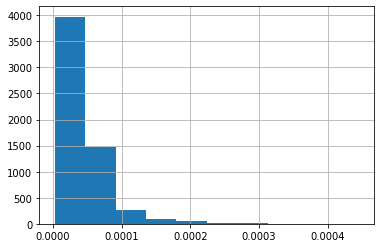

In [ ]:
col = final_cols[2]
print(col)
data[col].hist()

In [ ]:
data.pop('subject#')
data.pop('test_time')
data['Jitter(Abs)'] = np.log(data['Jitter(Abs)'])
data['Shimmer:APQ11'] = np.log(data['Shimmer:APQ11'])
data['NHR'] = np.log(data['NHR'])

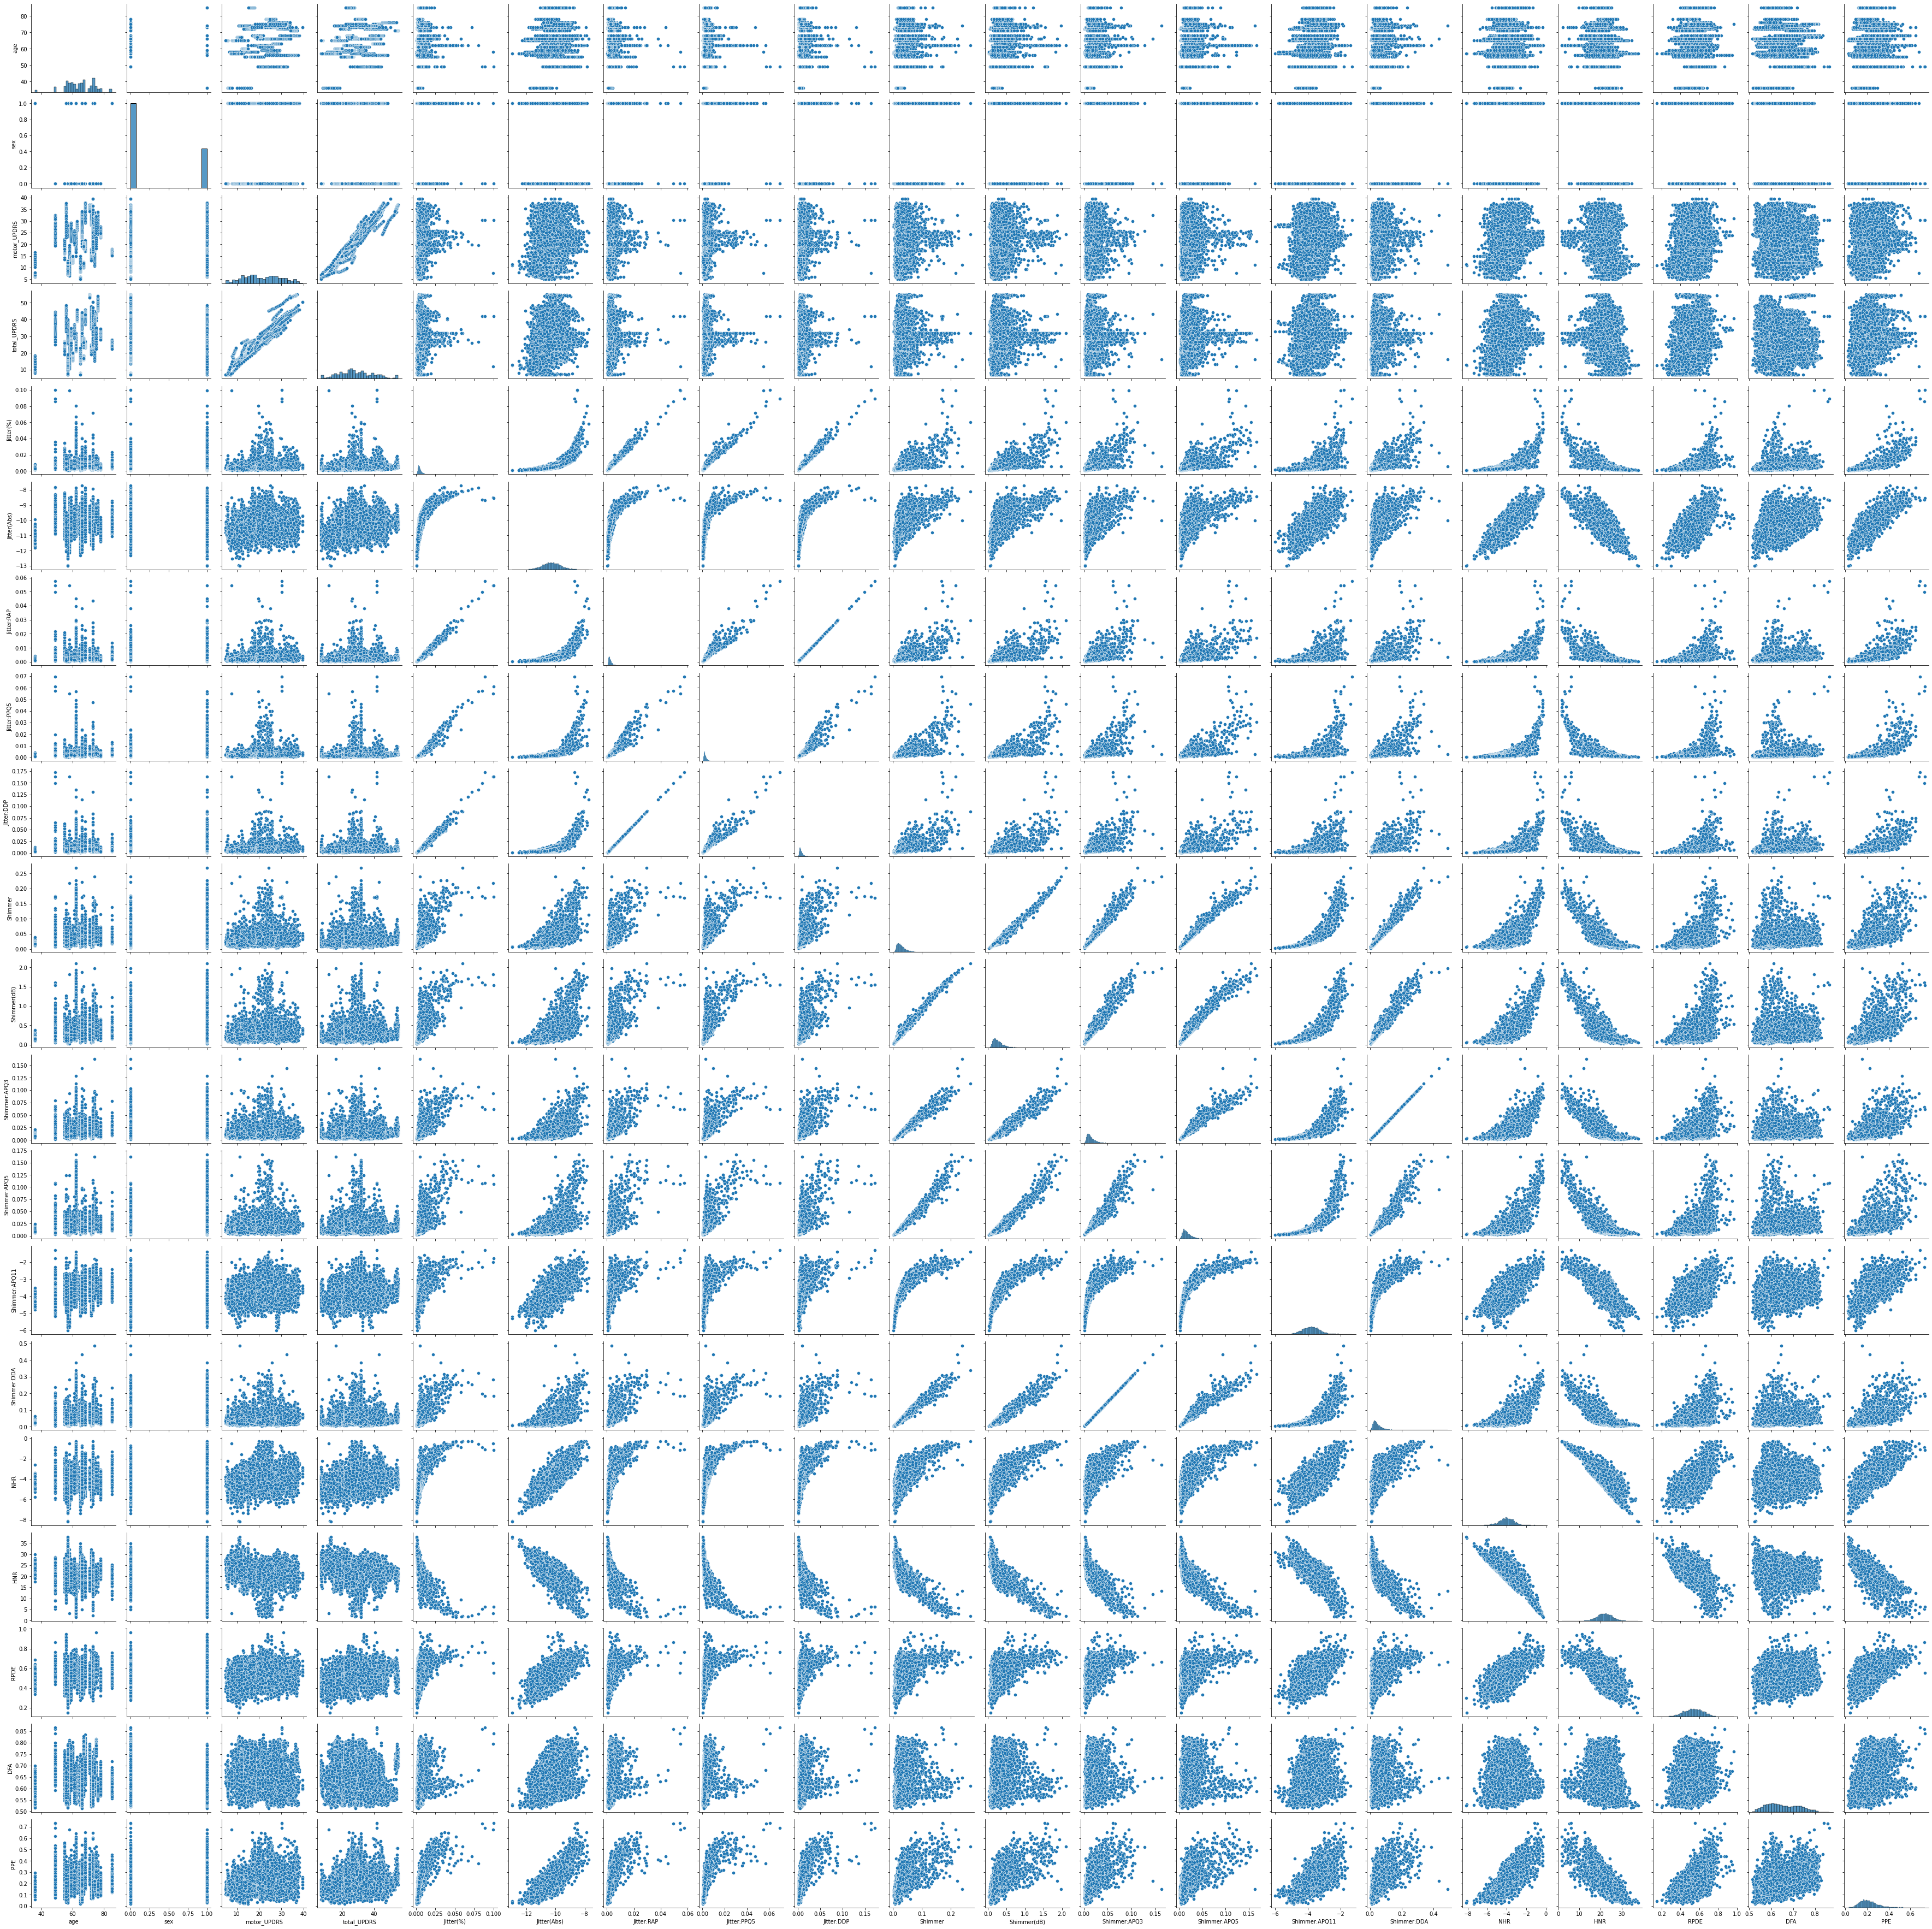

In [ ]:
sns.pairplot(data, vars=data.columns[:])

In [ ]:
data_mean=data.mean()
data_std=data.std()
data_norm=(data-data_mean)/data_std

In [ ]:
data_norm=data_norm.iloc[:,1:]
train, test= train_test_split(data_norm, test_size=0.2, random_state=0)

In [ ]:
import statsmodels.api as sm
columns = list(train.columns)
columns.remove('total_UPDRS')
columns.remove('Shimmer:DDA')
columns.remove('Jitter:DDP')
columns.remove('Shimmer')
columns.remove('Jitter(%)')
columns.remove('Shimmer:APQ5')
columns.remove('Shimmer(dB)')
columns.remove('Jitter:PPQ5')
columns.remove('Shimmer:APQ3')
columns.remove('Jitter:RAP')
columns.remove('HNR')
columns.remove('Shimmer:APQ11')

X_train = train[columns]
Y_train = train['total_UPDRS']

X_test = test[columns]
Y_test = test['total_UPDRS']

train_new = sm.add_constant(X_train)
test_new = sm.add_constant(X_test)

full_mod = sm.OLS(Y_train, train_new)
full_res = full_mod.fit()

print('\n\n', full_res.summary())
print('\n Variarion Inflation Factor')
c_names = X_train.columns
for i in range(len(columns)):
  x_vars = list(c_names)
  y_var = x_vars.pop(i)
  mod = sm.OLS(X_train[y_var], sm.add_constant(train_new[x_vars]))
  res = mod.fit()
  vif = 1/(1 - res.rsquared)
  print(y_var, round(vif, 3))



                             OLS Regression Results                            
Dep. Variable:            total_UPDRS   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     6948.
Date:                Sat, 25 Sep 2021   Prob (F-statistic):               0.00
Time:                        13:57:46   Log-Likelihood:                -253.75
No. Observations:                3535   AIC:                             523.5
Df Residuals:                    3527   BIC:                             572.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0015      0.004      0.351   

In [ ]:
final_cols = X_train.columns

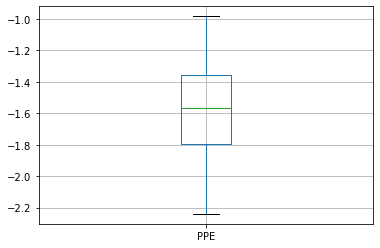

In [ ]:
data.boxplot(final_cols[6])

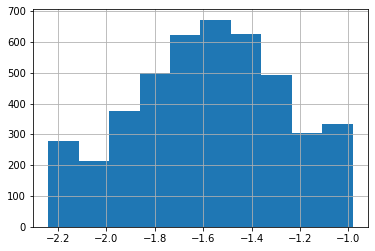

In [ ]:
#data.loc[data['Jitter(Abs)'] > data['Jitter(Abs)'].quantile(0.99)] = data['Jitter(Abs)'].quantile(0.99)
#data.loc[data['Jitter(Abs)'] < data['Jitter(Abs)'].quantile(0.01)] = data['Jitter(Abs)'].quantile(0.01)

#data = data[data['NHR'] > -8]
#data = data[data['NHR'] < -1]
#min_t = data['NHR'].quantile(0.03)
#max_t = data['NHR'].quantile(0.97)
#data.loc[data['NHR'] > max_t] = max_t
#data.loc[data['NHR'] < min_t] = min_t

#data = data[data['RPDE'] < 0.9]
#data = data[data['RPDE'] > -2]
#min_t = data['RPDE'].quantile(0.03)
#max_t = data['RPDE'].quantile(0.97)
#data.loc[data['RPDE'] < min_t] = min_t
#data.loc[data['RPDE'] > max_t] = max_t

data = data[data['DFA'] > 0.4]

#data['PPE'] = np.log(data['PPE'])
data = data[data['PPE'] > -2.5]
data = data[data['PPE'] < 0]
min_t = data['PPE'].quantile(0.03)
max_t = data['PPE'].quantile(0.97)
data.loc[data['PPE'] < min_t] = min_t
data.loc[data['PPE'] > max_t] = max_t
data['PPE'].hist()

In [ ]:
len(data)

4419

In [ ]:
model1=SGDRegressor(random_state=0)
param_sgd={'eta0':[0.0005,0.0006,0.0007,0.0008,0.0009,0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009], 'alpha':[0.00001, 0.00002, 0.00003, 0.00004, 0.00005]}
grid_sgd=GridSearchCV(model1, param_sgd, cv=5, scoring='neg_mean_squared_error')

In [ ]:
grid_sgd.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SGDRegressor(alpha=0.0001, average=False,
                                    early_stopping=False, epsilon=0.1,
                                    eta0=0.01, fit_intercept=True,
                                    l1_ratio=0.15, learning_rate='invscaling',
                                    loss='squared_loss', max_iter=1000,
                                    n_iter_no_change=5, penalty='l2',
                                    power_t=0.25, random_state=0, shuffle=True,
                                    tol=0.001, validation_fraction=0.1,
                                    verbose=0, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-05, 2e-05, 3e-05, 4e-05, 5e-05],
                         'eta0': [0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001,
                                  0.002, 0.003, 0.004, 0.005, 0.006, 0.007,
                                  0.008, 0.009]},


In [ ]:
print(grid_sgd.best_params_)

{'alpha': 1e-05, 'eta0': 0.009}


In [ ]:
final_model=grid_sgd.best_estimator_
pred=final_model.predict(X_test)
eval=r2_score(Y_test, pred)

In [ ]:
eval

0.932988525642735

In [ ]:
def prediction(data, test):
    y_mean=data['total_UPDRS'].mean()
    y_std=data['total_UPDRS'].std()
    pred=final_model.predict(test)
    return pred*y_std+y_mean